# <center><bold>Tutorial 1</bold></center>

Importing Cell-Cycle-Set excel dataset spreadsheet set using pandas

In [16]:
import pandas as pd

df = pd.read_excel('Cell-Cycle-Set.xlsx')

# Droping columns with missing values
df.dropna(inplace=True)


## <pre>        <b>Week 1</b></pre>
### Task 1

Generated a histogram of the RNA and Protein distribution of the G2 cell cycle stage

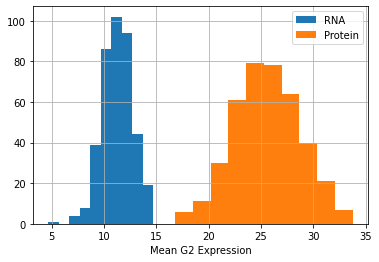

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig1, ax1 = plt.subplots()
df.mean_RNA_G2.hist(ax=ax1, label='RNA')
df.mean_protein_G2.hist(ax=ax1, label='Protein')
ax1.legend()
ax1.set_xlabel('Mean G2 Expression')
plt.close()

fig1

<b>Do you notice anything interesting with regards to the mean/variance of the distribution?</b><br> The amount of RNA directly correlates with the amount of Proteins. But not a 1 to 1 correlation because one RNA can make multiple Proteins. RNA has higher mean and lesser variants compared to Proteins.
<br><br>

### Task 2

Generated pairwise correlations between RNA and Protein for each stage of cell cycle

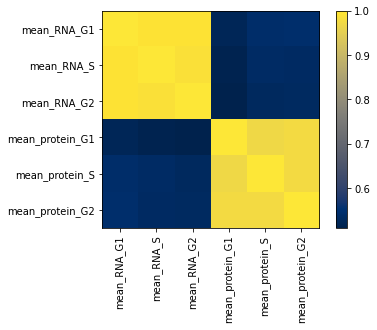

In [18]:
fig2,ax2 = plt.subplots()
cax = ax2.imshow(df.corr(), cmap='cividis')
ax2.set_xticklabels(df.columns, rotation=90)
ax2.set_yticklabels(df.columns)
fig2.colorbar(cax)
plt.close()
fig2

<b>Does the change in timestep have much effect on the relationship(s) between RNA and protein?</b> <br> The cell cycles have extremely high correlatation between themselves (i.e., RNA and RNA). The amount of RNA in stage G1 correlates more to the amount of Proteins in G2 rather than in G1. The amount of RNA in stage S correlates most to the Protein amount in S. So, the amount of RNA in stage G1 has the most influence on the amount of Proteins in the later stages of the cell cycle.
<br><br>

### Task 3

Generated scatterplots of the RNA versus compared to protein for each cell cycle stage

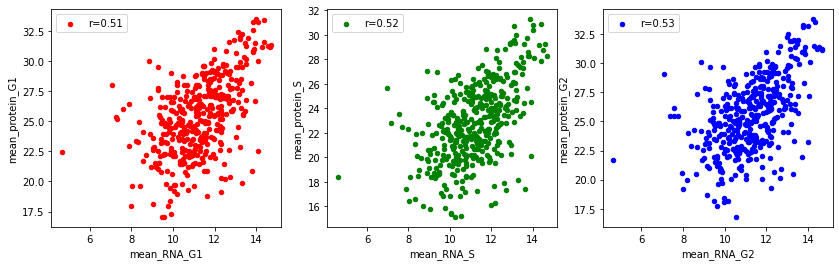

In [19]:
from scipy.stats import spearmanr
import seaborn as sns

fig3, ax3 = plt.subplots(ncols=3, figsize=(14,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax3[0], color='r', label='r={:0.2f}'.format(
            spearmanr(df.mean_RNA_G1.values, df.mean_protein_G1.values)[0]
        ))

df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax3[1], color='g', label='r={:0.2f}'.format(
            spearmanr(df.mean_RNA_S.values, df.mean_protein_S.values)[0]
        ))
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax3[2], color='b', label='r={:0.2f}'.format(
            spearmanr(df.mean_RNA_G2.values, df.mean_protein_G2.values)[0]
        ))
plt.close()

fig3

<br><br>
<b>Linear model fitted to the data ↓</b>

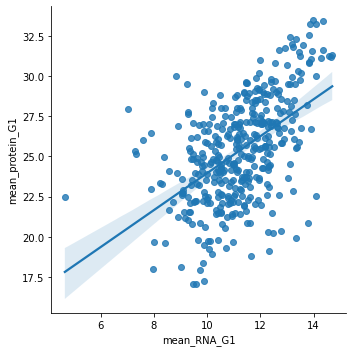

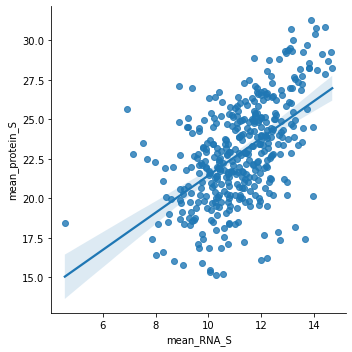

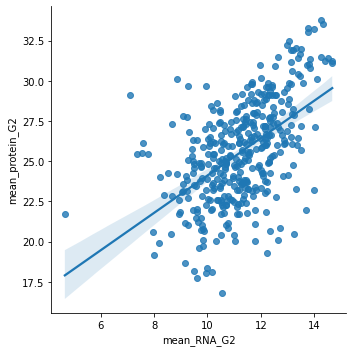

In [20]:
import seaborn as sns

sns.lmplot(x='mean_RNA_G1',y='mean_protein_G1',data=df,fit_reg=True)

sns.lmplot(x='mean_RNA_S',y='mean_protein_S',data=df,fit_reg=True)

sns.lmplot(x='mean_RNA_G2',y='mean_protein_G2',data=df,fit_reg=True) 
plt.show()

<b>Can we infer protein concentration from RNA concentration?</b> <br> We can see that usually more RNA means more Proteins. Although, some small numbers of RNAs can still produce a substantial amount Proteins.

<br><br><br>
## <pre>        <b>Week 2</b></pre>
### Task 1

Plotted all genes that contain <b>'cell cycle'</b> in their GOBP term for each cell cycle phase

71


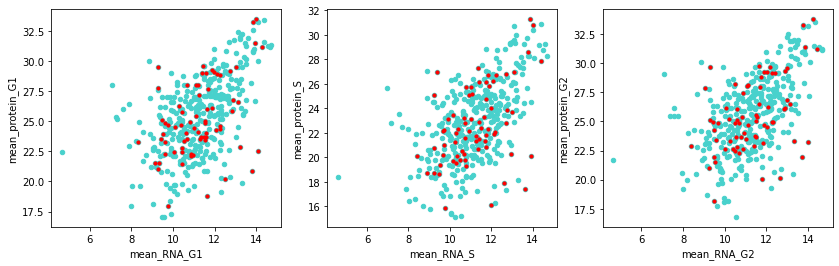

In [21]:
gobp = df[df.GOBP.str.contains('cell cycle')]
fig4,ax4 = plt.subplots(ncols=3, figsize=(14,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax4[0], color='mediumturquoise')
ax4[0].scatter(gobp.mean_RNA_G1, gobp.mean_protein_G1, color='r', s=10.)
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax4[1], color='mediumturquoise')
ax4[1].scatter(gobp.mean_RNA_S, gobp.mean_protein_S, color='r', s=10.)
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax4[2], color='mediumturquoise')
ax4[2].scatter(gobp.mean_RNA_G2, gobp.mean_protein_G2, color='r', s=10.)
print(len(gobp))
plt.close()

fig4

<b>Is there a stronger/weaker correlation?</b> It seems that the genes involved in the cell cycle were barely or not at all active below 8 units of RNA amount, way below medium. Correlation between the amounts of Proteins, RNA and active cell cycle genes seems to be strong, but it slows down above protein 28 units.
<br><br>


The graphs below show the clusters of all the genes that contribute to the cell cycle, so the quantaties are more apparent.

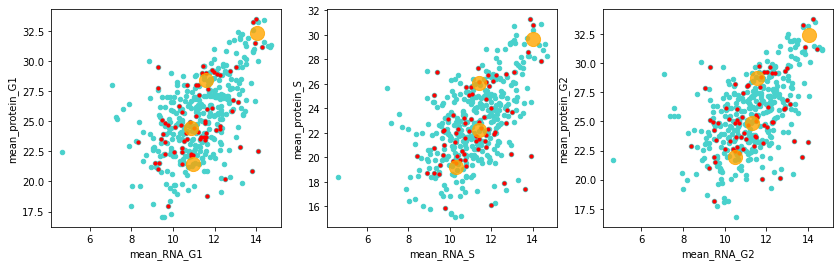

In [22]:
from sklearn.cluster import KMeans

gobp = df[df.GOBP.str.contains('cell cycle')]
fig41,ax41 = plt.subplots(ncols=3, figsize=(14,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax41[0], color='mediumturquoise')
ax41[0].scatter(gobp.mean_RNA_G1, gobp.mean_protein_G1, color='r', s=10.)
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax41[1], color='mediumturquoise')
ax41[1].scatter(gobp.mean_RNA_S, gobp.mean_protein_S, color='r', s=10.)
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax41[2], color='mediumturquoise')
ax41[2].scatter(gobp.mean_RNA_G2, gobp.mean_protein_G2, color='r', s=10.)
plt.close()


kmeans = KMeans(n_clusters= 4) 

label = kmeans.fit_predict(gobp[['mean_RNA_G1', 'mean_protein_G1']])
centers = kmeans.cluster_centers_ 
ax41[0].scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.8)


label = kmeans.fit_predict(gobp[['mean_RNA_S', 'mean_protein_S']])
centers = kmeans.cluster_centers_ 
ax41[1].scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.8)

label = kmeans.fit_predict(gobp[['mean_RNA_G2', 'mean_protein_G2']])
centers = kmeans.cluster_centers_ 
ax41[2].scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.8)

fig41

### Task 2

Plotted all genes that contain <b>'ribosome'</b> in their GOCC term for each cell cycle phase

71


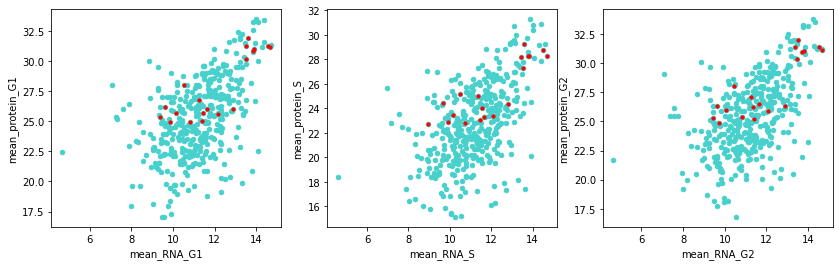

In [23]:
gocc = df[df.GOCC.str.contains('ribosome')]
fig5,ax5 = plt.subplots(ncols=3, figsize=(14,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax5[0], color='mediumturquoise')
ax5[0].scatter(gocc.mean_RNA_G1, gocc.mean_protein_G1, color='r', s=10.)
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax5[1], color='mediumturquoise')
ax5[1].scatter(gocc.mean_RNA_S, gocc.mean_protein_S, color='r', s=10.)
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax5[2], color='mediumturquoise')
ax5[2].scatter(gocc.mean_RNA_G2, gocc.mean_protein_G2, color='r', s=10.)
print(len(gobp))
plt.close()

fig5

Strong correlation between ribosomes and Proteins as ribosomes serve protein synthesis in the cell.
<br><br>


The graphs below show the clusters of all the genes that contain 'ribosome' in their GOCC term, so the quantaties are more apparent.

71


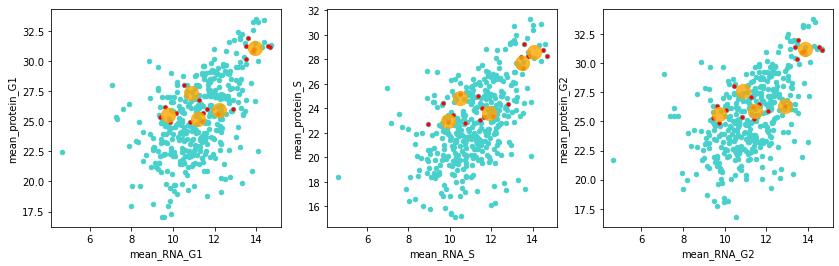

In [24]:
from sklearn.cluster import KMeans

gocc = df[df.GOCC.str.contains('ribosome')]
fig52,ax52 = plt.subplots(ncols=3, figsize=(14,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax52[0], color='mediumturquoise')
ax52[0].scatter(gocc.mean_RNA_G1, gocc.mean_protein_G1, color='r', s=10.)
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax52[1], color='mediumturquoise')
ax52[1].scatter(gocc.mean_RNA_S, gocc.mean_protein_S, color='r', s=10.)
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax52[2], color='mediumturquoise')
ax52[2].scatter(gocc.mean_RNA_G2, gocc.mean_protein_G2, color='r', s=10.)
print(len(gobp))
plt.close()

kmeans = KMeans(n_clusters= 5) 

label = kmeans.fit_predict(gocc[['mean_RNA_G1', 'mean_protein_G1']])
centers = kmeans.cluster_centers_ 
ax52[0].scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.8)


label = kmeans.fit_predict(gocc[['mean_RNA_S', 'mean_protein_S']])
centers = kmeans.cluster_centers_ 
ax52[1].scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.8)

label = kmeans.fit_predict(gocc[['mean_RNA_G2', 'mean_protein_G2']])
centers = kmeans.cluster_centers_ 
ax52[2].scatter(centers[:, 0], centers[:, 1], c='orange', s=200, alpha=0.8)

fig52

### Task 3

Counted the number of occurrences of every GOBP term across all genes

In [25]:
pd.options.display.max_rows = 100
print(df.GOBP.str.split(';',expand=True).stack().value_counts())

cellular process                  377
metabolic process                 273
cellular metabolic process        260
primary metabolic process         255
biological regulation             236
                                 ... 
rRNA import into mitochondrion      1
RNA import into mitochondrion       1
cyanate metabolic process           1
cyanate catabolic process           1
response to interferon-alpha        1
Length: 2854, dtype: int64


<b>what are some of the difficulties that arise when using these terms?</b>  <br>Some are very specific gene annotations, some are very generic. This results in data that is hard to interpret.
<br><br>

In [26]:
new_df = df[~df['GOBP'].str.contains('cellular process')]
print(len(new_df))
print(new_df['Gene_Name'])

15
5         SHTN1
71       SAMHD1
132       TUFT1
133    SELENBP1
151      ATPAF1
175        KLC2
268       NAA35
283      TIMM23
286      PITRM1
318       PMPCB
345     ANKRD17
370      PITPNB
401        PLD3
434        MSI2
480         LSR
Name: Gene_Name, dtype: object


These are the only genes that are not part of cellular processes
<br> 

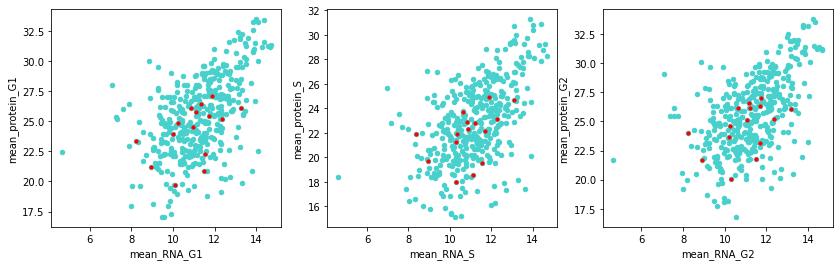

In [27]:
fig51,ax51 = plt.subplots(ncols=3, figsize=(14,4))
df.plot.scatter('mean_RNA_G1', 'mean_protein_G1', ax=ax51[0], color='mediumturquoise')
ax51[0].scatter(new_df.mean_RNA_G1, new_df.mean_protein_G1, color='r', s=10.)
df.plot.scatter('mean_RNA_S', 'mean_protein_S', ax=ax51[1], color='mediumturquoise')
ax51[1].scatter(new_df.mean_RNA_S, new_df.mean_protein_S, color='r', s=10.)
df.plot.scatter('mean_RNA_G2', 'mean_protein_G2', ax=ax51[2], color='mediumturquoise')
ax51[2].scatter(new_df.mean_RNA_G2, new_df.mean_protein_G2, color='r', s=10.)
plt.close()

fig51

These are the genes that are not involved in the cellular process ploted against all RNA - Proteins scatter through cell phases. No apparent extremes, they are within the medium.
<br><br>

### Task 4

Calculated the change in mRNA/protein level across the cell cycle

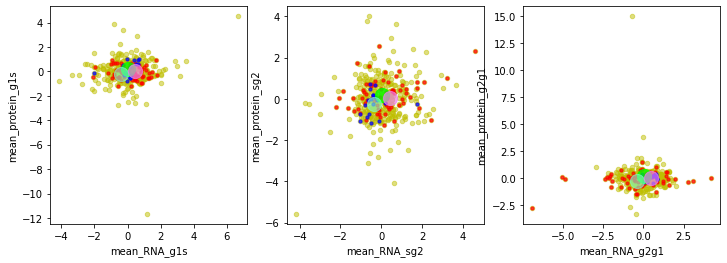

In [28]:
df['mean_RNA_g1s'] = (df.mean_RNA_S - df.mean_RNA_G1)
df['mean_RNA_sg2'] = (df.mean_RNA_G2 - df.mean_RNA_S)
df['mean_RNA_g2g1'] = (df.mean_RNA_G1 - df.mean_RNA_G2)
df['mean_protein_g1s'] = (df.mean_protein_S - df.mean_protein_G1)
df['mean_protein_sg2'] = (df.mean_protein_G2 - df.mean_protein_S)
df['mean_protein_g2g1'] = (df.mean_protein_G1 - df.mean_protein_G2)

# standardise
df.iloc[:,-6:] = (df.iloc[:,-6:] - df.iloc[:,-6:].mean(axis=0)) / df.iloc[:,-6:].std(axis=0)

gobp = df[df.GOBP.str.contains('cell cycle')]
gocc = df[df.GOCC.str.contains('ribosome')]
fig6,ax6 = plt.subplots(ncols=3, figsize=(12,4))
df.plot.scatter('mean_RNA_g1s', 'mean_protein_g1s', ax=ax6[0], color='y', alpha=.5)
df.plot.scatter('mean_RNA_sg2', 'mean_protein_sg2', ax=ax6[1], color='y',alpha=.5)
df.plot.scatter('mean_RNA_g2g1', 'mean_protein_g2g1', ax=ax6[2], color='y', alpha=.5)
ax6[0].scatter(gobp.mean_RNA_g1s, gobp.mean_protein_g1s, color='r', s=10., alpha=.7)
ax6[1].scatter(gobp.mean_RNA_sg2, gobp.mean_protein_sg2, color='r', s=10., alpha=.7)
ax6[2].scatter(gobp.mean_RNA_g2g1, gobp.mean_protein_g2g1, color='r', s=10., alpha=.7)
ax6[0].scatter(gocc.mean_RNA_g1s, gocc.mean_protein_g1s, color='b', s=10., alpha=.7)
ax6[1].scatter(gocc.mean_RNA_sg2, gocc.mean_protein_sg2, color='b', s=10., alpha=.7)
ax6[2].scatter(gocc.mean_RNA_g2g1, gocc.mean_protein_g2g1, color='b', s=10., alpha=.7)
plt.close()

kmeans = KMeans(n_clusters= 1) 

label = kmeans.fit_predict(gocc[['mean_RNA_g1s', 'mean_protein_g1s']])
centers = kmeans.cluster_centers_ 
ax6[0].scatter(centers[:, 0], centers[:, 1], c='lime', s=200, alpha=0.8)

label = kmeans.fit_predict(gocc[['mean_RNA_g1s', 'mean_protein_g1s']])
centers = kmeans.cluster_centers_ 
ax6[1].scatter(centers[:, 0], centers[:, 1], c='lime', s=200, alpha=0.8)

label = kmeans.fit_predict(gocc[['mean_RNA_g1s', 'mean_protein_g1s']])
centers = kmeans.cluster_centers_ 
ax6[2].scatter(centers[:, 0], centers[:, 1], c='lime', s=200, alpha=0.8)


label = kmeans.fit_predict(gocc[['mean_RNA_sg2', 'mean_protein_sg2']])
centers = kmeans.cluster_centers_ 
ax6[0].scatter(centers[:, 0], centers[:, 1], c='aquamarine', s=200, alpha=0.6)

label = kmeans.fit_predict(gocc[['mean_RNA_sg2', 'mean_protein_sg2']])
centers = kmeans.cluster_centers_ 
ax6[1].scatter(centers[:, 0], centers[:, 1], c='aquamarine', s=200, alpha=0.6)

label = kmeans.fit_predict(gocc[['mean_RNA_sg2', 'mean_protein_sg2']])
centers = kmeans.cluster_centers_ 
ax6[2].scatter(centers[:, 0], centers[:, 1], c='aquamarine', s=200, alpha=0.6)


label = kmeans.fit_predict(gocc[['mean_RNA_g2g1', 'mean_protein_g2g1']])
centers = kmeans.cluster_centers_ 
ax6[0].scatter(centers[:, 0], centers[:, 1], c='violet', s=200, alpha=0.7)

label = kmeans.fit_predict(gocc[['mean_RNA_g2g1', 'mean_protein_g2g1']])
centers = kmeans.cluster_centers_ 
ax6[1].scatter(centers[:, 0], centers[:, 1], c='violet', s=200, alpha=0.7)

label = kmeans.fit_predict(gocc[['mean_RNA_g2g1', 'mean_protein_g2g1']])
centers = kmeans.cluster_centers_ 
ax6[2].scatter(centers[:, 0], centers[:, 1], c='violet', s=200, alpha=0.7)

fig6

The vast majority of the proteins are not changing around the cell cycle. Clustering of GOBP and GOCC terms is apparent as seen in cluster plot.